In [1]:
import pandas as pd
#import numpy as np
pd.set_option("display.max_columns", 300)
import seaborn as sns

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')

In [4]:
ordinal.shape

(2580, 83)

In [6]:
outs = ordinal.loc[[50, 309, 2004]]
outs

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
50,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,5.0,6.0,3.0,1.0,0.0,0.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,0.0,1.0,9.0,1.0,2592,150000,60.0,10890,5,6,1923,1950,0.0,371.0,0.0,925.0,1296.0,1296,1296,0,2.0,0.0,2,0,6,2,12,0,1976.982048,0.0,0.0,0,742,240,0,0,0,1512
309,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,4676,184750,130.0,40094,10,5,2007,2008,762.0,2260.0,0.0,878.0,3138.0,3138,1538,0,1.0,0.0,3,1,3,1,11,1,2007.000000,3.0,884.0,208,406,0,0,0,0,0
2004,12.0,6.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,3.0,1.0,6.0,13.0,14.0,2.0,2.0,2.0,0.0,5.0,5.0,2.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,5.0,5.0,3.0,0.0,5.0,2.0,3.0,0.0,1.0,8.0,0.0,9.0,4.0,3608,475000,90.0,22950,10,9,1892,1993,0.0,0.0,0.0,1107.0,1107.0,1518,1518,572,0.0,0.0,2,1,4,1,12,2,1993.000000,3.0,840.0,0,260,0,0,410,0,0


In [5]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [7]:
idx1 = outs.index
idx1

Int64Index([50, 309, 2004], dtype='int64')

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [9]:
X = ordinal.values

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
X_reduce = pca.fit_transform(X_scaled)

In [12]:
X_reduce

array([[-3.18084605, -1.21724258,  0.47118556],
       [-0.50650486, -4.28402002, -0.83059859],
       [-3.29639081, -1.45794266, -0.18948965],
       ...,
       [-1.67316614,  3.71408425,  1.00209982],
       [ 3.28732425,  0.73610524, -1.33565729],
       [ 3.17598024,  1.84761111, -1.2864249 ]])

In [13]:
outlier_index = list(outs.index)
outlier_index

[50, 309, 2004]

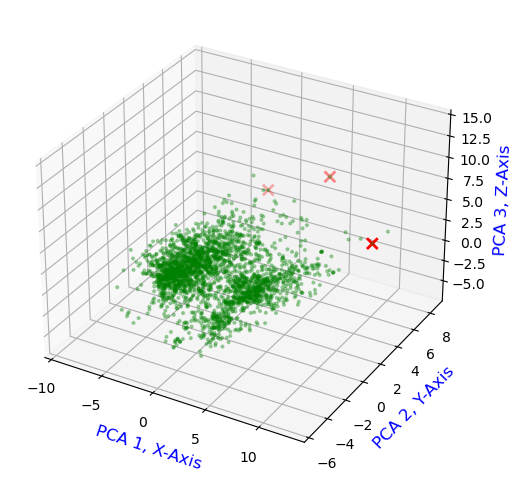

In [29]:
plt.style.use('default')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PCA 1, X-Axis', fontsize=12, color='blue')
ax.set_ylabel('PCA 2, Y-Axis', fontsize=12, color='blue')
ax.set_zlabel('PCA 3, Z-Axis', fontsize=12, color='blue')

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, 
           label="inliers",c="green", alpha=0.3)

ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers");


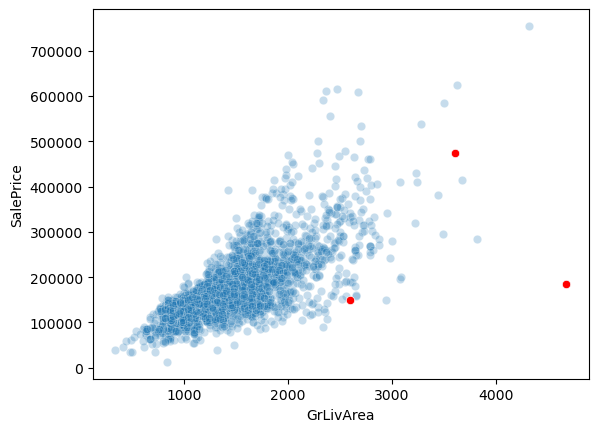

In [32]:
sns.scatterplot(data=ordinal, x='GrLivArea', y='SalePrice', alpha=0.25)
sns.scatterplot(data=outs, x='GrLivArea', y='SalePrice', color='red');

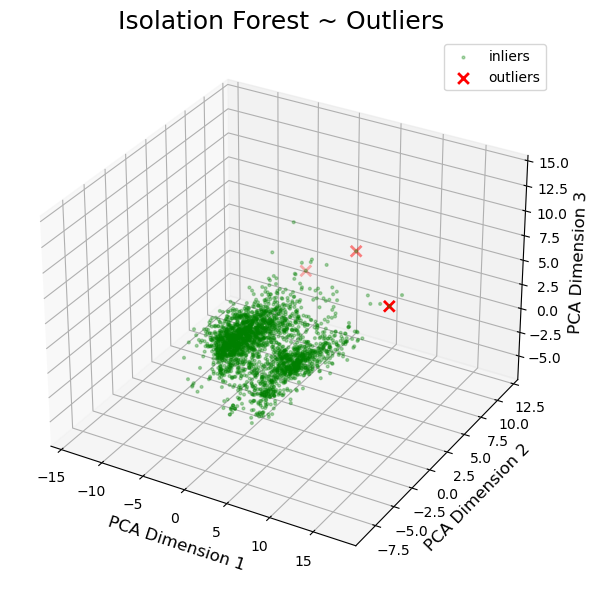

In [61]:
plt.style.use('default')
#plt.style.use('ggplot')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
#ax.set_zlabel("x_composite_3")




#plt.figure(figsize=(8,4))
#sns.boxplot(data=combo[['SLR MAE Area', 'SLR MAE Qual']], showmeans=True,
#                        meanprops={"marker":"o",
#                       "markerfacecolor":"white", 
#                       "markeredgecolor":"black",
#                      "markersize":"8"}, palette='coolwarm')
#plt.xticks(rotation=25)
#plt.ylabel('Mean Absolute Error (US$)', fontsize=14)
#plt.xlabel('Model', fontsize=14)
#plt.title('K-Fold CV MAE Comparison By Model', fontsize=18, color='blue')

#plt.tight_layout();



# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, 
           label="inliers",c="green", alpha=0.3)

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("Isolation Forest ~ Outliers", fontsize=18, color='black')
ax.set_xlabel('PCA Dimension 1', fontsize=12)
ax.set_ylabel('PCA Dimension 2', fontsize=12)
ax.set_zlabel('PCA Dimension 3', fontsize=12)
plt.margins(x=0.3, y=0.3)
plt.tight_layout()
plt.show();

In [34]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

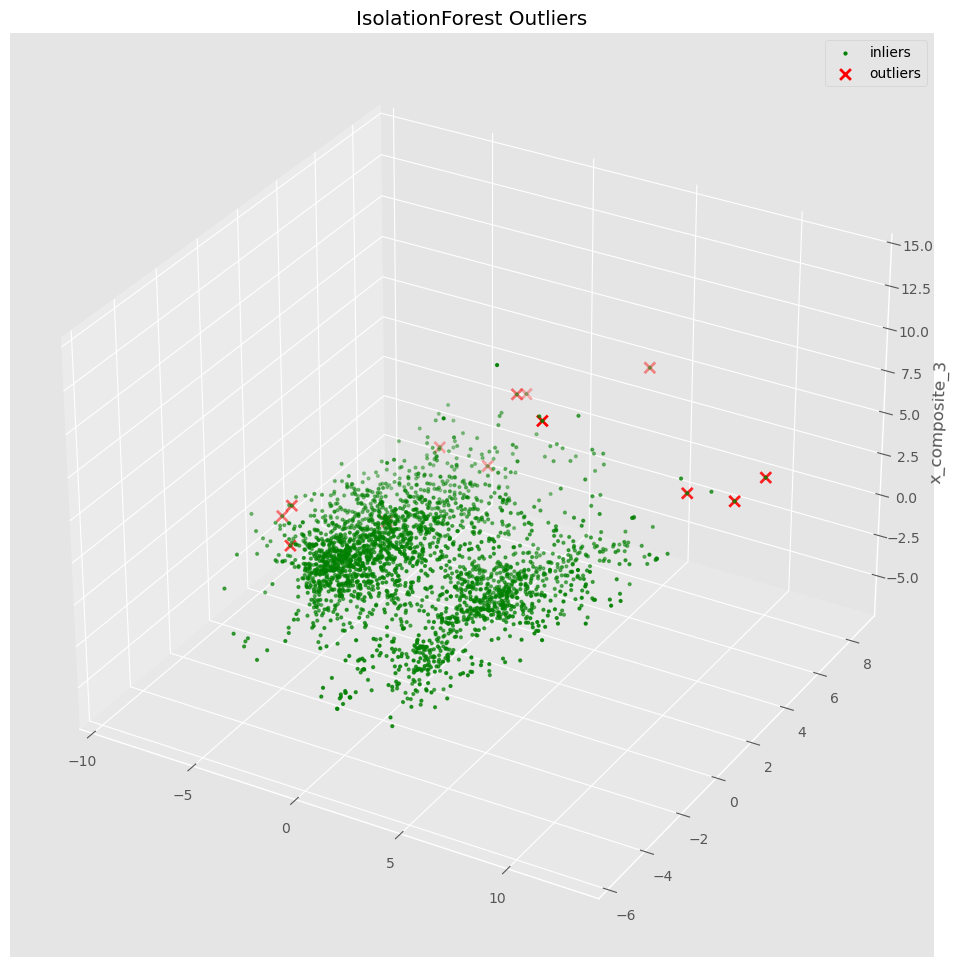

In [39]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("IsolationForest Outliers")
plt.show()

In [36]:
outlier_index = list(chosen.index)
outlier_index

[23, 50, 309, 487, 1007, 1233, 2004, 2204, 2273, 2323, 2425, 2436]

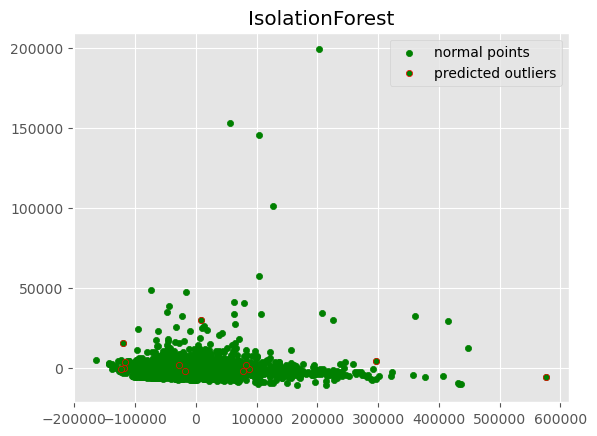

In [37]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [38]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

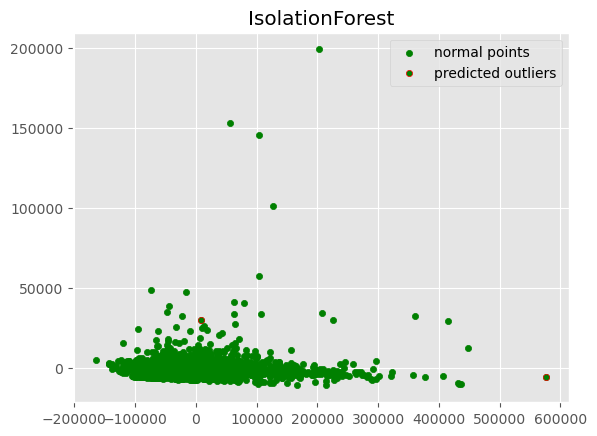

In [39]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()